# Stock Analysis using Jupyter in Vscode

In [2]:
#install necessary libraries and yahoo api
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%pip install yfinance
import yfinance as yf
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Get start and End Stock data for Tesla, Google and Amazon
start = "2014-01-01"
end = '2022-1-01'
TSLA = yf.download('TSLA',start,end)
AMZ = yf.download('AMZN',start,end)
GOOG = yf.download('GOOGL',start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


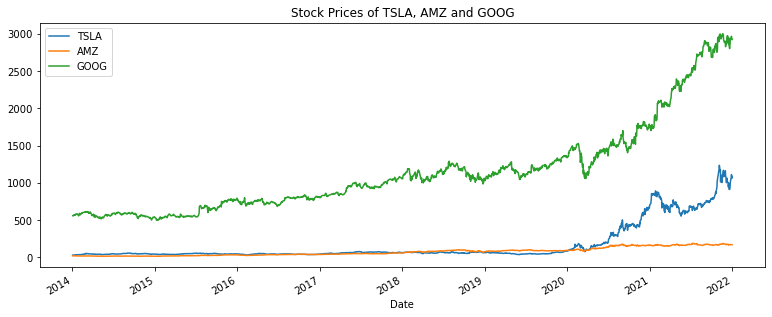

In [4]:
#Plot stocks graph showing prices overtime 
TSLA['Open'].plot(label = 'TSLA', figsize = (13,5))
AMZ['Open'].plot(label = "AMZ")
GOOG['Open'].plot(label = 'GOOG')
plt.title('Stock Prices of TSLA, AMZ and GOOG')
plt.legend()

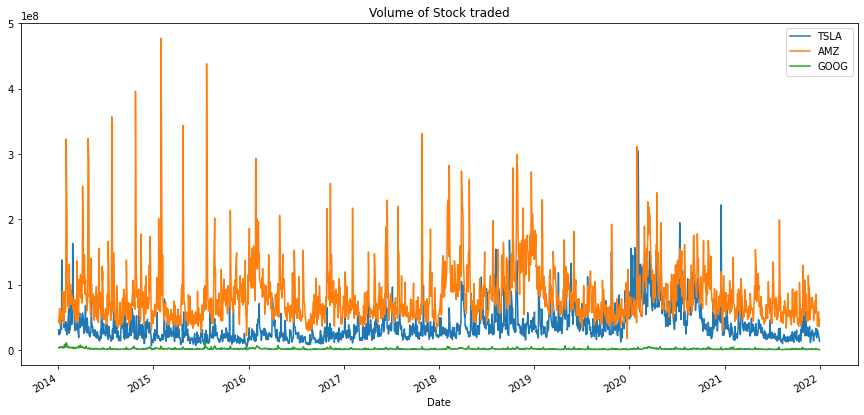

In [5]:
#Plot graph to show volume of stocks traded overtime
TSLA['Volume'].plot(label = 'TSLA', figsize = (15,7))
AMZ['Volume'].plot(label = "AMZ")
GOOG['Volume'].plot(label = 'GOOG')
plt.title('Volume of Stock traded')
plt.legend()

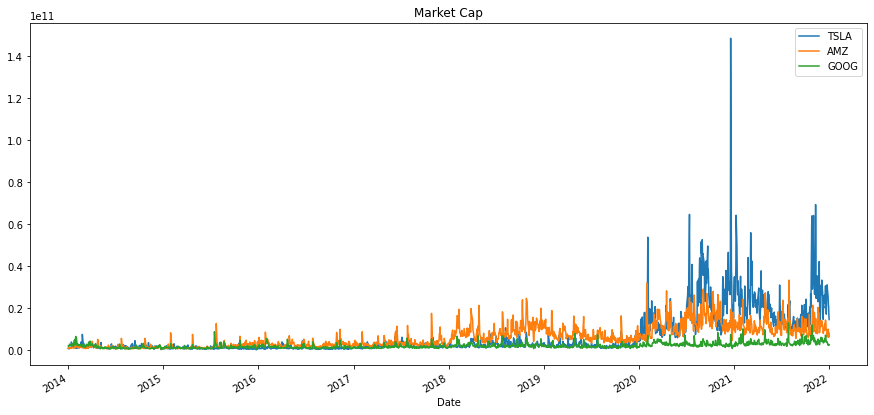

In [6]:
#Market Capitalisation ovetime
TSLA['MarktCap'] = TSLA['Open'] * TSLA['Volume']
AMZ['MarktCap'] = AMZ['Open'] * AMZ['Volume']
GOOG['MarktCap'] = GOOG['Open'] * GOOG['Volume']
TSLA['MarktCap'].plot(label = 'TSLA', figsize = (15,7))
AMZ['MarktCap'].plot(label = 'AMZ')
GOOG['MarktCap'].plot(label = 'GOOG')
plt.title('Market Cap')
plt.legend()

<AxesSubplot:xlabel='Date'>

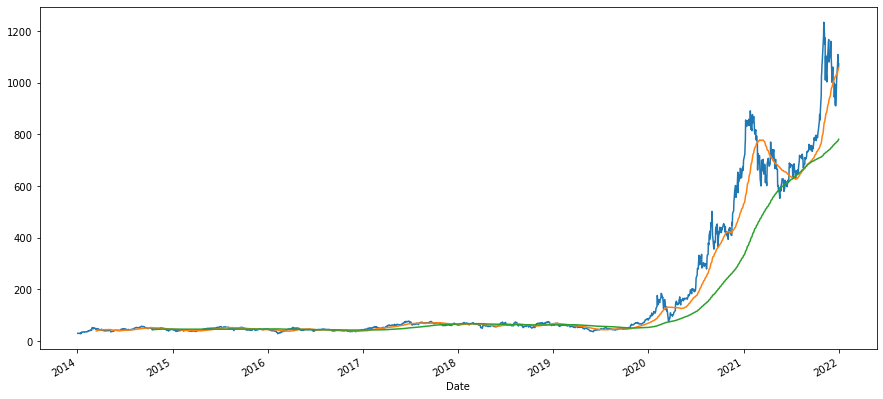

In [7]:
#Moving Average for Tesla
TSLA['MA50'] = TSLA['Open'].rolling(50).mean()
TSLA['MA200'] = TSLA['Open'].rolling(200).mean()
TSLA['Open'].plot(figsize = (15,7))
TSLA['MA50'].plot()
TSLA['MA200'].plot()

array([[<AxesSubplot:xlabel='TSLAOpen', ylabel='TSLAOpen'>,
        <AxesSubplot:xlabel='AMZOpen', ylabel='TSLAOpen'>,
        <AxesSubplot:xlabel='GOOGOpen', ylabel='TSLAOpen'>],
       [<AxesSubplot:xlabel='TSLAOpen', ylabel='AMZOpen'>,
        <AxesSubplot:xlabel='AMZOpen', ylabel='AMZOpen'>,
        <AxesSubplot:xlabel='GOOGOpen', ylabel='AMZOpen'>],
       [<AxesSubplot:xlabel='TSLAOpen', ylabel='GOOGOpen'>,
        <AxesSubplot:xlabel='AMZOpen', ylabel='GOOGOpen'>,
        <AxesSubplot:xlabel='GOOGOpen', ylabel='GOOGOpen'>]], dtype=object)

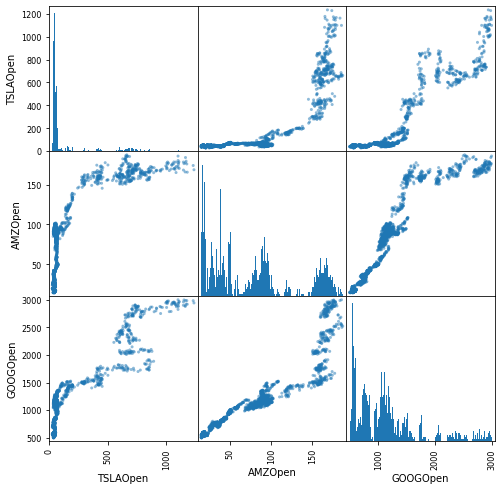

In [8]:
#Scatter plot matrix
data = pd.concat([TSLA['Open'],AMZ['Open'],GOOG['Open']],axis = 1)
data.columns = ['TSLAOpen','AMZOpen','GOOGOpen']
scatter_matrix(data, figsize = (8,8), hist_kwds= {'bins':250})
#Google and amazon show a linear coorelation

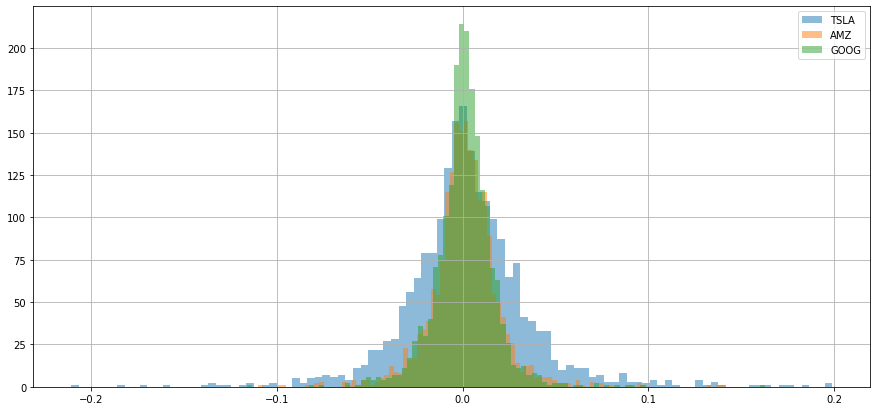

In [9]:
#Volatility
TSLA['returns'] = (TSLA['Close']/TSLA['Close'].shift(1)) -1
AMZ['returns'] = (AMZ['Close']/AMZ['Close'].shift(1))-1
GOOG['returns'] = (GOOG['Close']/GOOG['Close'].shift(1)) - 1
TSLA['returns'].hist(bins = 100, label = 'TSLA', alpha = 0.5, figsize = (15,7))
AMZ['returns'].hist(bins = 100, label = 'AMZ', alpha = 0.5)
GOOG['returns'].hist(bins = 100, label = 'GOOG', alpha = 0.5)
plt.legend()
#Tesla the most volatile 

# Conclusion
## Tesla has a linear relationship with Google